```
Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners
Answer: Boosting is an ensemble technique that combines multiple weak learners to create a strong learner. Weak models are trained in series
such that each next model tries to correct errors of the previous model
until the entire training dataset is predicted correctly. One of the most
well-known boosting algorithms is AdaBoost (Adaptive Boosting).

Initialize Model Weights: Begin with a single weak learner and assign equal weights to all training examples.

Train Weak Learner: Train weak learners on these dataset.

Sequential Learning: Boosting works by training models sequentially where each model focuses on correcting the errors of its predecessor. Boosting
typically uses a single type of weak learner like decision trees.

Weight Adjustment: Boosting assigns weights to training datapoints. Misclassified examples receive higher weights in the next iteration so that next models pay more attention to them.

```


```
Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
Answer:Both AdaBoost and Gradient Boosting build strong models by combining multiple weak learners (usually decision trees), but they differ in how they focus on mistakes

AdaBoost (Adaptive Boosting)

->Trains learners sequentially.

->Each new model focuses more on samples that were misclassified previously.

->Adjusts sample weights — increasing weight for hard-to-predict examples.

->Works best with binary classification.

2. Gradient Boosting

->Trains models sequentially as well.

->Focuses on minimizing a loss function (like MSE for regression or log loss for classification).

->Each new model tries to fit the residual errors (gradients) of the previous ensemble.

->Very flexible: can be used for regression and classification.
```

```
Question 3: How does regularization help in XGBoost?
Answer:XGBoost minimizes the following objective:

Objective = Loss + Regularization

The regularization term penalizes complex trees using:

🔹 1. Tree Complexity Control

XGBoost adds a penalty for:

Number of leaf nodes (γ – gamma)

Magnitude of leaf weights (L1 and L2 penalties)

2. Key Regularization Parameters
  ->Parameter	Purpose
  ->gamma	Prevents unnecessary splits
  ->lambda	L2 regularization on leaf weights
  ->alpha	L1 regularization on leaf weights
  ->max_depth	Limits tree depth
  ->min_child_weight	Prevents splitting on small noisy samples
  ->subsample	Uses only a fraction of rows
  ->colsample_bytree	Uses a fraction of features
3. Benefits of Regularization in XGBoost
  ->Reduces overfitting
  ->Improves generalization to unseen data
  ->Controls noisy and high-dimensional datasets
  ->Produces simpler, more stable trees
```

```
Question 4: Why is CatBoost considered efficient for handling categorical data?
Answer: CatBoost efficiently handles categorical data by using ordered target encoding and native categorical support, which prevents target
leakage, reduces overfitting, and eliminates the need for manual encoding.

```

```
Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?
Answer: Boosting techniques are preferred over bagging methods in real-world problems where high predictive accuracy, complex feature interactions, and bias reduction are more important than simply reducing variance.

Real-World Applications Where Boosting Is Preferred
1. Credit Scoring & Loan Default Prediction
->Used by banks and fintech companies.
->Boosting models (XGBoost, LightGBM, CatBoost) capture complex financial behavior.
->Handle imbalanced datasets better than bagging.

2. Fraud Detection
->Fraud cases are rare and hard to detect.
->Boosting focuses on misclassified (hard) cases, improving recall.
->Common in banking, insurance, and e-commerce.

3. Search Engine Ranking
->Gradient boosting (e.g., LambdaMART) is widely used by search engines.
->Directly optimizes ranking loss.
->Bagging methods like Random Forest are less effective for ranking tasks.

4. Recommendation Systems
->Used in e-commerce and streaming platforms.
->Boosting learns subtle interactions between users and items.
->Produces better ranking and personalization results.

5. Customer Churn Prediction
->Identifies customers likely to leave.
->Boosting captures behavioral patterns and feature interactions more accurately.

6. Medical Risk Prediction
->Used for disease risk scoring and diagnosis support.
->Boosting provides higher accuracy on complex clinical data.

```

In [8]:
# Datasets:
# ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
# ● Use sklearn.datasets.fetch_california_housing() for regression
# tasks.
# Question 6: Write a Python program to:
# ● Train an AdaBoost Classifier on the Breast Cancer dataset
# ● Print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

X, y = load_breast_cancer(return_X_y=True)

In [6]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
classifier = AdaBoostClassifier()
classifier

AdaBoostClassifier()

In [12]:
classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [13]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [15]:
# Evaluate the model
print("Current model performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Current model performance:
Accuracy: 0.9415204678362573


In [16]:
# Question 7: Write a Python program to:
# ● Train a Gradient Boosting Regressor on the California Housing dataset
# ● Evaluate performance using R-squared score
# Answer:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)



R-squared Score: 0.7756446042829697


In [18]:
# Question 8: Write a Python program to:
# ● Train an XGBoost Classifier on the Breast Cancer dataset
# ● Tune the learning rate using GridSearchCV
# ● Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost Classifier
xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

# Hyperparameter grid (learning rate tuning)
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 200],
    "max_depth": [3, 5]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Train model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)



Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.956140350877193


In [20]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.1 MB/s eta 0:00:00


Model Accuracy: 0.9649122807017544


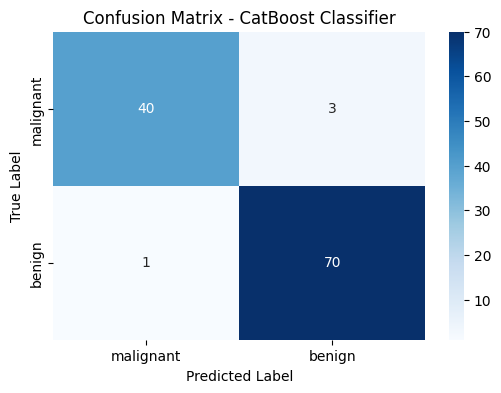

In [21]:
# Question 9: Write a Python program to:
# ● Train a CatBoost Classifier
# ● Plot the confusion matrix using seaborn
# Answer:


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=data.target_names,
    yticklabels=data.target_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


In [ ]:
# Question 10: You're working for a FinTech company trying to predict loan default using
# customer demographics and transaction behavior.
# The dataset is imbalanced, contains missing values, and has both numeric and
# categorical features.
# Describe your step-by-step data science pipeline using boosting techniques:
# ● Data preprocessing & handling missing/categorical values
# ● Choice between AdaBoost, XGBoost, or CatBoost
# ● Hyperparameter tuning strategy
# ● Evaluation metrics you'd choose and why
# ● How the business would benefit from your model
# (Include your Python code and output in the code box below.)
# Answer:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from catboost import CatBoostClassifier

# Example: Load data (placeholder)
df = pd.read_csv("loan_data.csv")

X = df.drop("default", axis=1)
y = df["default"]

# Identify categorical features
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train CatBoost
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=[1, 4],  # handle imbalance
    verbose=0
)

model.fit(X_train, y_train, cat_features=cat_features)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


### Question 10: FinTech Loan Default Prediction Pipeline

**Problem Statement:** Predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

**Answer: Step-by-Step Data Science Pipeline**

#### 1. Data Preprocessing & Handling Missing/Categorical Values

*   **Missing Values:**
    *   **Numeric Features:** Impute missing values using techniques like mean, median, or more sophisticated methods like K-Nearest Neighbors (KNN) imputation, or even model-based imputation (e.g., using a simple regressor to predict missing values). The choice depends on the extent and pattern of missingness.
    *   **Categorical Features:** Impute missing values with the mode, a special 'Missing' category, or advanced techniques like multiple imputation.
    *   *Consideration:* For tree-based models like CatBoost, missing values can sometimes be handled intrinsically by the algorithm without explicit imputation if specified.

*   **Categorical Features:**
    *   **High Cardinality:** For categorical features with many unique values, consider target encoding (like CatBoost's ordered target encoding), feature hashing, or grouping rare categories.
    *   **Lower Cardinality:** One-hot encoding can be used for features with fewer unique categories, especially for models that don't inherently handle categorical data.
    *   *Choice:* For CatBoost, the model efficiently handles categorical features internally using a permutation-driven approach (ordered target encoding) to prevent target leakage, eliminating the need for manual encoding beforehand. We would explicitly pass the list of categorical feature names to the `cat_features` parameter.

*   **Feature Scaling:** While tree-based models are generally not sensitive to feature scaling, it might be beneficial for regularization or if other non-tree models are considered in an ensemble.

*   **Outlier Treatment:** Identify and handle outliers. Depending on the feature and domain knowledge, outliers can be capped, transformed, or treated using robust scaling methods. (Less critical for tree-based models unless they represent data errors).

#### 2. Choice Between AdaBoost, XGBoost, or CatBoost

Given the problem characteristics (imbalanced dataset, missing values, both numeric and categorical features), **CatBoost** is the preferred choice.

*   **AdaBoost:** While effective, it's typically more sensitive to noisy data and outliers, and its performance can degrade if the weak learners are too weak or the dataset is complex with many features. It also doesn't natively handle categorical features or missing values.
*   **XGBoost:** A strong contender, highly efficient, and offers good performance. It requires manual handling of categorical features (one-hot encoding or other schemes) and missing values (though it can handle sparse matrices well). It's also prone to overfitting if not carefully tuned.
*   **CatBoost (Preferred):**
    *   **Native Categorical Feature Handling:** Its standout feature is its ability to handle categorical features directly using ordered target encoding, which prevents target leakage and reduces overfitting. This eliminates the need for extensive manual preprocessing.
    *   **Robust to Missing Values:** Can handle missing values intrinsically.
    *   **Handles Imbalanced Data:** Supports `class_weights` or `auto_class_weights` parameters to address class imbalance, which is crucial for loan default prediction.
    *   **Gradient Boosting:** Builds on the strengths of gradient boosting, providing high predictive accuracy.
    *   **Ordered Boosting:** A unique boosting scheme that helps combat prediction shift, leading to more robust models.

#### 3. Hyperparameter Tuning Strategy

Given the importance of accuracy in a FinTech context, a robust tuning strategy is essential.

*   **Cross-Validation:** Use k-fold cross-validation (e.g., `StratifiedKFold` to preserve class distribution, especially for imbalanced data) for reliable hyperparameter evaluation and to prevent overfitting to the validation set.

*   **Search Strategy:**
    *   **Grid Search:** Good for exploring a small, predefined set of hyperparameters, but can be computationally expensive for many parameters.
    *   **Random Search:** More efficient than grid search for larger search spaces, as it samples randomly and often finds good parameters quicker.
    *   **Bayesian Optimization (Preferred):** For optimal and efficient tuning, Bayesian optimization (e.g., using libraries like `Hyperopt` or `Optuna`) is highly recommended. It intelligently explores the hyperparameter space by building a probabilistic model of the objective function, leading to faster convergence to optimal parameters.

*   **Key CatBoost Hyperparameters to Tune:**
    *   `iterations` (or `n_estimators`): Number of boosting rounds.
    *   `learning_rate`: Step size shrinkage to prevent overfitting.
    *   `depth`: Depth of the trees.
    *   `l2_leaf_reg`: L2 regularization coefficient.
    *   `random_strength`: To make splits random and prevent overfitting.
    *   `border_count`: For numeric features, the number of splits.
    *   `class_weights`: Crucial for imbalanced datasets.

#### 4. Evaluation Metrics

For an imbalanced binary classification problem like loan default prediction, standard accuracy can be misleading. More robust metrics are required:

*   **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):**
    *   **Why:** This is a primary metric. It measures the ability of the model to distinguish between classes across various threshold settings. A higher AUC indicates better discrimination. It's less sensitive to class imbalance than accuracy.

*   **Precision, Recall, and F1-Score (especially for the minority class - 'default'):**
    *   **Why:** These metrics provide a more granular view of performance. For loan default:
        *   **Recall (Sensitivity):** Proportion of actual defaults correctly identified. High recall is important to minimize missed defaults, which can lead to financial losses.
        *   **Precision:** Proportion of predicted defaults that are actual defaults. High precision is important to avoid flagging too many non-defaulters, which can inconvenience customers and increase operational costs for false positives.
        *   **F1-Score:** Harmonic mean of precision and recall, providing a balanced measure.

*   **Confusion Matrix:**
    *   **Why:** Visualizes the number of true positives, true negatives, false positives, and false negatives. Essential for understanding where the model is succeeding and failing, and for deriving precision/recall.

*   **Custom Business Metrics:** Depending on the company's specific risk tolerance and cost of errors (false positives vs. false negatives), a custom cost-sensitive metric could be developed.

#### 5. How the Business Would Benefit from Your Model

Implementing this boosting-based model would provide significant benefits to the FinTech company:

*   **Reduced Financial Losses:** By accurately identifying potential defaulters (**high recall**), the company can proactively deny loans to high-risk applicants or offer alternative financial products, significantly reducing non-performing assets and write-offs.
*   **Optimized Risk Management:** The model provides a data-driven approach to assess creditworthiness, moving beyond traditional credit scores and incorporating behavioral data for a more comprehensive risk profile.
*   **Improved Operational Efficiency:** Automating the risk assessment process can speed up loan application approvals for low-risk individuals, improving customer experience and reducing manual review efforts.
*   **Enhanced Customer Segmentation:** The model can help segment customers into different risk tiers, allowing the company to tailor loan products, interest rates, and marketing strategies more effectively.
*   **Better Resource Allocation:** By focusing resources on genuinely high-risk cases (identified with **high precision**), the company avoids wasting time and effort on false positives.
*   **Proactive Interventions:** For identified high-risk borrowers, the company can implement early intervention strategies (e.g., financial counseling, flexible payment plans) to prevent actual default, fostering customer loyalty and minimizing losses.
*   **Competitive Advantage:** A superior prediction model leads to more prudent lending decisions, giving the company an edge in the competitive FinTech landscape.

In [ ]:
#example
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from catboost import CatBoostClassifier

# Example: assume df is your FinTech dataset
# target column: 'loan_default'

X = df.drop('loan_default', axis=1)
y = df['loan_default']

# Identify categorical features
cat_features = X.select_dtypes(include=['object']).columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# CatBoost Classifier
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    class_weights=[1, 5],  # handle imbalance
    verbose=0
)

# Train model
model.fit(X_train, y_train, cat_features=cat_features)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))